# ontology extraction

In [11]:
import requests
from bs4 import BeautifulSoup

# Send HTTP GET request to the website
url = "https://www.ricochet-jeunes.org/livres/"
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find the theme information
options = soup.find("select",{"name":"book_field_book_themes[]"}).findAll("option")
ricochet_themes = [option.text for option in options]
ricochet_themes

["Abandon/Sentiment d'abandon",
 'Abécédaire/Alphabet',
 'Abeille',
 'Aborigène',
 'Absence',
 'Absurde',
 'Abus sexuel',
 'Accident',
 'Activités manuelles',
 "Activités/Cahier d'activités",
 "Adaptation (d'œuvre littéraire)",
 'Adolescence',
 'Adoption',
 'Adultère',
 'Affection/Tendresse',
 'Affirmation de soi',
 'Afghanistan',
 'Afrique',
 'Afrique du Nord',
 'Afrique du Sud',
 'Aide humanitaire',
 'Alaska',
 'Album',
 'Album sans texte',
 'Alcool/Alcoolisme',
 'Algérie',
 'Alimentation/Goût',
 'Allemagne',
 'Alphabétisation',
 'Alpinisme',
 'Amérique du Nord',
 'Amérique latine',
 'Amitié',
 'Amnésie',
 'Amour',
 'Analyse de texte',
 'Ane',
 'Ange',
 'Animaux',
 'Anniversaire/Fête',
 'Anorexie/Boulimie',
 'Antilles/Caraïbes',
 'Antiquité (Gaule)',
 'Antiquité (Grèce)',
 'Antiquité (Rome)',
 'Antisémitisme',
 'Apartheid',
 'Apprentissage',
 'Apprentissage de la vie',
 'Araignée',
 'Arbre',
 'Archéologie',
 'Architecture',
 'Argent/Argent de poche',
 'Argentine',
 'Arménie',
 'Art',

In [13]:
ricochet_themes_local = ["Abandon/Sentiment d'abandon", 'Abécédaire/Alphabet', 'Abeille', 'Aborigène', 'Absence', 'Absurde', 'Abus sexuel', 'Accident', 'Activités manuelles', "Activités/Cahier d'activités", "Adaptation (d'œuvre littéraire)", 'Adolescence', 'Adoption', 'Adultère', 'Affection/Tendresse', 'Affirmation de soi', 'Afghanistan', 'Afrique', 'Afrique du Nord', 'Afrique du Sud', 'Aide humanitaire', 'Alaska', 'Album', 'Album sans texte', 'Alcool/Alcoolisme', 'Algérie', 'Alimentation/Goût', 'Allemagne', 'Alphabétisation', 'Alpinisme', 'Amérique du Nord', 'Amérique latine', 'Amitié', 'Amnésie', 'Amour', 'Analyse de texte', 'Ane', 'Ange', 'Animaux', 'Anniversaire/Fête', 'Anorexie/Boulimie', 'Antilles/Caraïbes', 'Antiquité (Gaule)', 'Antiquité (Grèce)', 'Antiquité (Rome)', 'Antisémitisme', 'Apartheid', 'Apprentissage', 'Apprentissage de la vie', 'Araignée', 'Arbre', 'Archéologie', 'Architecture', 'Argent/Argent de poche', 'Argentine', 'Arménie', 'Art', 'Art brut', 'Art urbain', 'Asie', 'Astrologie', 'Astronomie', "Atelier d'écriture", 'Australie', 'Autisme', 'Autobiographie', 'Automne', 'Automobile/Voiture', 'Autriche', 'Autruche', 'Aventure', 'Avion/Aviation', 'Bain/Toilette', 'Bande dessinée', 'Bande dessinée (Histoire)', 'Bandit/Brigand', 'Banlieue', 'Bateau/Voilier', 'Beauté/Laideur', 'Bébé', 'Belgique', 'Berceuse', 'Bestiaire', 'Bêtise/Désobéissance', 'Bhoutan', 'Bible', 'Bibliographie/Sélection de livre', 'Bibliothèque', 'Bibliothèque jeunesse', 'Bicyclette/Vélo', 'Bien-être animal', 'Bijou/Diamant', 'Biographie', 'Bise/Bisou/Baiser', 'Bison', 'Blaireau', 'Bolivie', 'Bonheur', 'Botanique', 'Bouddhisme', 'Boxe', 'Brésil', 'Bretagne', 'Bruits/Cris', 'Bulgarie', 'Burundi', 'Caillou/Rocher', 'Calligraphie', 'Cambodge', 'Cameroun', 'Campagne/Ferme', 'Camping', 'Canada', 'Canard/Oie', 'Caprice/Entêtement', 'Carnaval', 'Castor', 'Catastrophe naturelle', 'Catastrophe nucléaire', 'Cécité', 'Célébrité', 'Censure', 'Cerf-volant', 'Cerf/Biche', 'Chameau/Dromadaire', 'Champignon', 'Chanson/Chant', 'Chapeau', 'Chat', 'Château', 'Chaud/Froid', 'Chauve-souris', 'Chenille', 'Cheval/Equitation', 'Chevalier/Chevalerie', 'Chien', 'Chiffre/Nombre/Livre à compter', 'Chimie', 'Chine', 'Chocolat', 'Chômage', 'Chouette/Hibou', 'Ciel', 'Cinéma/Vidéo', 'Cinq sens', 'Cirque', 'Citation', 'Citoyenneté/Civisme', 'Clown', 'Coccinelle', 'Cochon/Sanglier', 'Coiffeur', 'Colère', 'Collection/Collectionneur', 'Collège', 'Colombie', 'Colonie de vacances', 'Colonisation/Colonie', 'Coloriage', 'Comédie musicale', 'Communication', 'Compétition', 'Comptine', 'Concentration', 'Condamnation à mort', 'Condition féminine', 'Condition sociale', 'Conformisme', 'Congo', "Conquête de l'Ouest américain", 'Consommation', 'Conte', 'Conte (adaptation)', 'Contraire', 'Corée', 'Corps', 'Correspondance', 'Corrida', 'Corse', 'Couleur', 'Courage', 'Crocodile/Alligator', 'Cuba', 'Cuisine/Recette', 'Culpabilité', 'Curiosité', 'Cygne', 'Danemark', 'Danse/Ballet', 'Dauphin/Baleine', 'Débarquement', 'Découverte', 'Déguisement', 'Délinquance', 'Déménagement', 'Dent', 'Dépression', 'Désert', 'Désespoir', 'Design', 'Dessin', 'Dessin animé', 'Détente/Relaxation', 'Développement durable', 'Devinette', 'Diable', 'Dictature', 'Différence', 'Dinosaure', 'Disparition', 'Documentaire', 'Dormir/Coucher', 'Double', 'Doudou/Peluche', 'Dragon', 'Drogue', 'Droit', "Droits de l'enfant", "Droits de l'homme", 'Dyslexie/Trouble de la lecture', 'Dystopie', 'Eau', 'Ecole', 'Ecole maternelle', 'Ecole primaire', 'Ecologie', 'Economie/Finance', 'Ecosse', 'Ecriture', 'Ecureuil', 'Edition', 'Edition - Petite Edition', 'Education', 'Egalité', 'Egoïsme', 'Egypte', 'Egypte ancienne', 'Elan', 'Electricité', 'Eléphant', 'Emotions', 'Encyclopédie/Dictionnaire', 'Energie', 'Enfance', 'Enfant des rues', 'Enfant sauvage', 'Enigme', 'Enlèvement/Kidnapping', 'Ennui', 'Enquête', 'Entraide/Solidarité', 'Environnement', 'Epreuve/Initiation', 'Équateur', 'Escargot', 'Esclavage', 'Espace/vaisseaux spatiaux', 'Espagne', 'Espionnage/Espion', 'Espoir', 'Etats-Unis', 'Eté', 'Ethiopie', 'Ethique/Morale', 'Etoile', 'Europe', "Europe de l'Est", 'Excision', 'Exclusion', 'Exil', 'Exploit', 'Exposition', 'Extraterrestre', 'Fable', 'Famille', "Famille d'accueil", 'Famille recomposée', 'Fantaisie', 'Fantastique', 'Fantôme', 'Fascisme', 'Fée', 'Femme/Homme', 'Fête foraine', 'Feu/Incendie', 'Fille/Garçon', 'Finlande', 'Fleur', 'Football', 'Forêt', 'Forme', 'Fourmi', 'France', 'Fruit', 'Fugue', 'Généalogie/Arbre généalogique', 'Générosité', 'Géographie/Atlas', 'Girafe', 'Gitan/Bohémien', 'Gourmandise', 'Grand Nord', 'Grand-Mère', 'Grand-Père', 'Grand/Petit', 'Grande-Bretagne', 'Grèce', 'Grenouille/Crapaud', 'Grève', 'Grimace', 'Gros/Maigre', 'Guatemala', 'Guerre/Conflit', 'Guide/Répertoire', 'Guyane', 'Habitation/Maison', 'Halloween', "Hamster/Cochon d'Inde", 'Handicap', 'Harcèlement', 'Hérisson', 'Héros', 'Heure', 'Hippopotame', 'Histoire', 'Histoire (Moyen-Age)', 'Histoire (Première Guerre mondiale)', 'Histoire (Révolution française)', 'Histoire (Seconde Guerre mondiale)', 'Histoire (XIX° siècle)', 'Histoire (XVIII° siècle)', 'Histoire (XVII° siècle)', 'Histoire (XVI° siècle)', 'Histoire (XV° siècle)', 'Histoire (XXI° siècle)', 'Histoire (XX° siècle)', "Histoire de l'art", 'Hiver', 'Holocauste', 'Homosexualité', 'Hongrie', 'Honte/Gêne', 'Hôpital', 'Humour', 'Hygiène/Propreté', 'Identité', 'Illettrisme', 'Illustration', 'Imagier', 'Imagination/Fabulation', 'Immigration/Emigration', 'Immortalité', 'Imprimerie', 'Inca/Aztèque', 'Inde', 'Indien', 'Individualisme', 'Indonésie', 'Inégalité/Injustice', 'Information/Actualité', 'Insecte', 'Instrument de musique', 'Intégration', 'Interculturalité', 'Internet', 'Inuit', 'Irak', 'Iran', 'Irlande', 'Islande', 'Israël', 'Italie', 'Jalousie', 'Jamaïque', 'Japon', 'Jardin', 'Jardinage/Potager', 'Jazz', "Jeu d'optique / Illusion d'optique", 'Jeu de doigts', 'Jeu de mots', 'Jeu vidéo', 'Jeu/Jouet', 'Jeux Olympiques', 'Journal intime', 'Journalisme', 'Judaïsme', 'Jumeaux/Jumelles', 'Justice', 'Kamishibaï', 'Kangourou', 'Koala', 'Kosovo', 'La Réunion', "Lac/Cours d'eau", 'Langue des signes', 'Langue étrangère (apprentissage)', 'Langue/Langage', 'Lapin/Lièvre', "Lecture de l'image", 'Légende arthurienne', 'Légendes/Merveilleux', 'Légume', 'Lemming', 'Léopard', 'Lever/Réveil', 'Liban', 'Liberté', 'Librairie', 'Licorne', 'Lion', 'Liste', 'Littérature', 'Littérature de jeunesse', 'Lituanie', 'Livre animé', 'Livre-jeu', 'Livre/Lecture', 'Londres', 'Loup', 'Loup-garou', 'Lumière', 'Lune', 'Lutin', 'Luxembourg', 'Lycée', 'Madagascar', 'Magasin/Commerce', 'Magie/Magicien', 'Maladie', 'Malaisie', 'Mali', 'Maltraitance', 'Mammouth', 'Manège', 'Manga', 'Manipulation', 'Manipulation génétique/Clonage', 'Mariage', 'Mariage forcé', 'Marionnette/Guignol', 'Maroc', 'Masque', 'Mathématique', 'Méchanceté/Cruauté', 'Médecin/Docteur', 'Médicament', 'Mélancolie', 'Mensonge/Vérité', 'Menstruation/Règles', 'Mer/Océan', 'Métamorphose', 'Météo/Climat', 'Métier', 'Métro', 'Mexique', 'Mille et une nuits', 'Mine/Mineur', 'Misère/Pauvreté', 'Mode', 'Monde arabe', 'Mongolie', 'Monstre', 'Montagne', 'Moquerie', 'Mort/Deuil', 'Mouche', 'Mouette', 'Moulin', 'Mouton/Chèvre', 'Moyen-Orient', 'Musée', 'Musique', 'Mystère', 'Mythologie', 'Naissance/maternité', 'Napoléon', 'Narrateur/Narration', 'Nature', 'Naufrage', 'Neige', 'Népal', 'New York', 'Noël', 'Normandie', 'Norvège', 'Nourrice/Baby-sitter', 'Nourriture', 'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Nouvelles technologies', 'Nuit', 'Obésité', 'Océanie', 'Odorat', 'Oeuf', 'Ogre/Géant', 'Oiseau', 'Opéra', 'Ordinateur/Informatique', 'Origami', 'Orphelin/Orphelinat', 'Ouïe', 'Ours', 'Paix/Pacifisme', 'Pakistan', 'Palestine', 'Panda', 'Papillon', 'Pâques', 'Paresse', 'Parfum', 'Paris', 'Parodie', 'Partage', 'Paternité', 'Patience/Impatience', 'Pays-Bas', 'Paysage', 'Pêche/Pêcheur', 'Pédagogie', 'Pédophilie', 'peintre', 'Peinture', 'Père Noël', 'Pérou', 'Perse', 'Persévérance', 'Petite enfance', 'Peur', 'Peur du noir/Cauchemar', 'Philosophie', 'Phoque/Morse', 'Photographie', 'Pingouin/Manchot', 'Pique-nique', 'Pirate/Corsaire', 'Piscine', 'Planète', 'Plante', 'Pluie/Orage', 'Poésie', 'Poison', 'Poisson', 'Policier', 'Politesse/Bienséance', 'Politique', 'Pollution', 'Pologne', 'Polynésie', 'Pompier', 'Port', 'Portrait', 'Portugal', 'Poule/Poussin/Coq', 'Poupée', 'Pouvoir', 'Poux', 'Pratiques artistiques et culturelles', 'Préhistoire', 'Préjugés', 'Prénom/Surnom', 'Prince/Princesse', 'Printemps', 'Prison', 'Prix littéraire', 'Promenade', 'Provence', 'Proverbe', 'Psychologie/Psychanalyse', 'Publicité', 'Puce', 'Punition/Fessée', 'Québec', 'Questions', 'Racisme', 'Racket', 'Réfugié', 'Relation Enfant/Adulte', 'Relation Enfant/Animal', 'Relation Frère/Soeur', 'Relation Grand-Mère/Enfant', 'Relation Grand-Parent/Enfant', 'Relation Grand-Père/Enfant', 'Relation Homme/Animal', 'Relation Mère/Enfant', 'Relation Mère/Fille', 'Relation Mère/Fils', 'Relation Père/Enfant', 'Relation Père/Fille', 'Relation Père/Fils', 'Relation Personne âgée/Enfant', 'Religion', 'Renard', 'Résistance', 'Respect', 'Responsabilité', 'Rêve', 'Révolte', 'Richesse', 'Ritournelle/Répétition', 'Rivalité/Dispute', 'Robot', 'Roi/Reine', 'Roman', 'Roman historique', 'Roman policier', 'Roumanie', 'Rue', 'Rumeur', 'Ruse', 'Russie', 'Rwanda', 'Sagesse', 'Saint-Nicolas', 'Saison/Année/Cycle des saisons', 'Santé', 'Sapin', 'Science', 'Science-Fiction', 'Sculpture', 'Secret', 'Secte', 'Sécurité routière', 'Ségrégation raciale', 'Sénégal', 'Séparation/Divorce', 'Serpent', 'Sexualité/Education sexuelle', 'Sida', 'Silence', 'Singe', 'Société', 'Soleil', 'Solitude', 'Sommeil', 'Son/Eveil sonore', 'Sorcier/Sorcellerie', 'Souffrance', 'Souris/Rat/Mulot', 'Souvenir/Mémoire', 'Spéléologie', 'Spiritualité', 'Sport', 'Steampunk', 'Sucre', 'Suède', 'Suicide', 'Suisse', 'Super-héros', 'Superstition', 'Surdité', 'Survie', 'Suspense', 'Syrie', 'Tabac/Tabagisme', 'Taïwan', 'Taupe', 'Téléphone', 'Télévision/Radio', 'Temps', 'Terre', 'Terrorisme', 'Thaïlande', 'Théâtre', "Théâtre d'ombres", 'Tibet', 'Tigre', 'Timidité', 'Tolérance', 'Tortue', 'Toucher/Matière', 'Tradition', 'Traduction', 'Train/Gare', 'Transidentité', 'Transport/Moyens de transport', 'Travail', 'Travail des enfants', 'Trésor', 'Trisomie', 'Tristesse/Chagrin', 'Tsigane', 'Tunisie', 'Turquie', 'Typographie', 'Tyrannie', 'Ukraine', 'Univers/Système solaire', 'Vacances', 'Vache', 'Vampire', 'Végétarisme/Végétalisme', 'Vénézuela', 'Vengeance', 'Venise', 'Vent', 'Vêtement', 'Vie quotidienne', 'Vieillesse', 'Vietnam', 'Viking', 'Ville', 'Viol', 'Violence', 'Voisinage', 'Vol/Voleur', 'Volcan', 'Voyage', 'Vue', 'Yéti', 'Yoga', 'Zèbre', 'Zombie', 'Zoo', 'Zoologie/Naturalisme']

In [3]:
ricochet_themes_local[-2]

'Zoo'

In [12]:

# Send HTTP GET request to the website
url = "https://www.ecoledesloisirs.fr/thematique/liste"
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find the theme information
high_level_themes = soup.find_all("label", class_="label_n1")
ecole_des_loisir_high_level_themes = [high_level_theme.text.strip() for high_level_theme in high_level_themes]
ecole_des_loisir_high_level_themes

# Find the theme information
sub_themes = soup.find_all("a", title="Afficher les livres de ce thème")
ecole_des_loisir_sub_theme_list = [sub_theme.text.strip() for sub_theme in sub_themes]
ecole_des_loisir_sub_theme_list


['âne',
 'animaux des champs et des bois',
 'animaux divers',
 'animaux domestiques',
 'araignée',
 'autruche, émeu',
 'baleine',
 'belette',
 'bison',
 'blaireau',
 'caméléon',
 'canard, oie',
 'castor',
 'cervidés',
 'chameau, dromadaire',
 'chamois',
 'chat',
 'chauve souris',
 'cheval',
 'chien',
 'cochon',
 'coyote, chacal',
 'crabe',
 'crocodile, alligator',
 'dauphin',
 'des animaux et des hommes',
 'dindon',
 'dinosaure (animal)',
 'écureuil',
 'éléphant',
 'escargot',
 'félins divers',
 'girafe',
 'gnou',
 'grenouille, crapaud, têtard',
 'hamster, cobaye',
 'hérisson, porc-épic',
 'hibou',
 'hippocampe',
 'hippopotame',
 'insectes divers',
 'kangourou',
 'koala',
 'lamantin',
 'lapin, lièvre',
 'lézard',
 'lion',
 'loir, lérot',
 'loup',
 'loutre',
 'lynx',
 'mammouth',
 'marmotte',
 'morse',
 'mouton, chèvre, bouc',
 'oiseaux divers',
 'opossum',
 'ornithorynque',
 'orque',
 'ours',
 'panda',
 'papillon',
 'paresseux (animal)',
 'phoque',
 'pieuvre, poulpe',
 'pingouin, manch

In [14]:
ecole_des_loisir_high_level_themes_local = ['animaux',
 'arts et spectacles',
 'corps humain',
 'étapes de la vie',
 'famille',
 'genres littéraires',
 'géographie',
 'Histoire',
 'jeu, image, son, langage',
 'psychologie',
 'sciences de la nature',
 'sciences et techniques',
 'vie en société',
 'ville et campagne']

In [15]:
ecole_des_loisir_high_level_themes_local[-3]

'sciences et techniques'

In [14]:
ecole_des_loisir_sub_theme_list_local = ['âne', 'animaux des champs et des bois', 'animaux divers', 'animaux domestiques', 'araignée', 'autruche, émeu', 'baleine', 'belette', 'bison', 'blaireau', 'caméléon', 'canard, oie', 'castor', 'cervidés', 'chameau, dromadaire', 'chamois', 'chat', 'chauve souris', 'cheval', 'chien', 'cochon', 'coyote, chacal', 'crabe', 'crocodile, alligator', 'dauphin', 'des animaux et des hommes', 'dindon', 'dinosaure (animal)', 'écureuil', 'éléphant', 'escargot', 'félins divers', 'girafe', 'gnou', 'grenouille, crapaud, têtard', 'hamster, cobaye', 'hérisson, porc-épic', 'hibou', 'hippocampe', 'hippopotame', 'insectes divers', 'kangourou', 'koala', 'lamantin', 'lapin, lièvre', 'lézard', 'lion', 'loir, lérot', 'loup', 'loutre', 'lynx', 'mammouth', 'marmotte', 'morse', 'mouton, chèvre, bouc', 'oiseaux divers', 'opossum', 'ornithorynque', 'orque', 'ours', 'panda', 'papillon', 'paresseux (animal)', 'phoque', 'pieuvre, poulpe', 'pingouin, manchot', 'poissons divers', 'poule, poussin, coq', 'raton laveur', 'renard', 'requin', 'rhinocéros', 'sanglier', 'serpent', 'singe, chimpanzé, gorille', 'souris, mulot, rat, campagnol', 'suricate, mangouste', 'tatou', 'taupe', 'tigre', 'tortue', 'vache, veau, taureau', 'ver de terre, lombric', 'yéti', 'zèbre', 'art pariétal, peinture rupestre', 'art traditionnel, arts premiers', 'cinéma', 'cirque', 'clown', "commedia dell'arte", 'créativité, création artistique', 'danse', 'funambule', 'guignol', 'Littérature, livre, écrivain', 'marionnette', 'mime', 'musique', 'opéra', 'peinture', 'photographie', 'photographie (livre de)', 'sculpture', 'street-art', 'théâtre (activité)', 'dent, dent de lait', 'main', 'schéma corporel', 'squelette', 'hygiène, propreté', 'pipi, caca, toilettes', 'pot', 'poux', 'beauté, laideur', 'coquetterie', 'imagerie du corps', 'autisme', 'corps et ses différences (le)', 'handicap', 'lunettes', 'grossesse, avortement', 'naissance, maternité', 'accident', 'alcoolisme', 'anorexie', 'appétit', 'bobo', 'boulimie', 'drogue, toxicomanie', 'épidémie', 'hospitalisation', 'maladie, docteur', 'pipi au lit, énurésie', 'santé', 'sida', 'homosexualité', 'puberté, transformation du corps', 'sexualité', 'dormir, coucher', 'peur du noir, cauchemar', 'rêve', 'les cinq sens', 'prévention (le corps)', 'repère spatio temporel', 'taille', "apprentissage de l'autonomie", 'apprentissage de la vie', 'premiers apprentissages', 'bébé', 'crèche', 'tétine, biberon', 'apprentissage des langues', 'classe de nature', 'collège, lycée, professeur', 'école buissonnière', 'école, instituteur', 'pensionnat', 'rentrée des classes', 'sortie scolaire', 'université', 'mort, deuil', 'prise de responsabilité', 'temps (qui passe)', 'vieillesse', 'généalogie', 'recherche de ses origines', 'bêtises, désobéissance', 'conflit parents, enfants', 'fratrie', 'fugue', 'grand-mère', 'grand-père', 'grands-parents', 'homoparentalité', 'jumeaux, jumelles', 'naissance, nouveau bébé dans la fratrie', 'relation avec la mère', 'relation avec le père', 'relation enfant, adulte', 'sœurs et frères : aîné, cadet', 'déménagement', 'désordre', 'vie quotidienne', 'adoption', 'dispute', 'divorce, séparation', 'en famille', 'enfant abandonné, abandon', 'enfant maltraité', "famille d'accueil", 'famille éclatée', 'famille monoparentale', 'famille recomposée, remariage', 'la famille', 'mariage', 'orphelin, orpheline', 'secrets de famille', 'vacances en famille', 'aventure et mystère', "cape et d'épée", 'histoire policière', 'récit de voyage', "roman d'aventure", 'conte détourné', 'conte détourné, le bal des 12 princesses', 'conte détourné, barbe bleue', 'conte détourné, blanche-neige', "conte détourné, boucle d'or et les 3 ours", 'conte détourné, cendrillon', 'conte détourné, la belle au bois dormant', 'conte détourné, la princesse au petit pois', 'conte détourné, le loup et les 7 cabris', 'conte détourné, le petit chaperon rouge', 'conte détourné, le petit poucet', 'conte détourné, les 3 petits cochons', 'conte détourné, les fées', 'contes du monde entier', 'contes et recueil de contes', 'fables', 'classique abrégé', 'classique intégral', "classiques du livre d'images", 'fantastique', 'fantasy', 'science-fiction', 'fables, fabliaux', 'Littérature du Moyen Âge', 'roman de la table ronde', 'cow-boy', 'super-héros', 'ange', 'chevalier', 'diable', 'dragon', 'fantôme', 'fée', 'géant', 'génie', 'licorne', 'lutin, troll, elfe, gnome', 'magicien, magie', 'monstre', 'nain', 'ogre', 'personnage de conte (divers)', 'prince, princesse', 'roi, reine', 'sirène', 'sorcier, sorcière', 'vampire', 'sketch', 'théâtre classique', 'théâtre contemporain', 'théâtre, pièce de théâtre', 'atlas', 'autobiographie', 'aventure', 'bande dessinée', 'biographie', 'comptine', 'conte', 'énigmes', 'épouvante', 'extraterrestre', 'humour', 'journal', 'lettres, correspondance', 'livre dont on est le héros', 'Livre ukrainien', 'Livre-jeu', 'MOOC', 'mythologie', 'parodie, pastiche', 'philosophie', 'poésie', 'proverbe', "recueil d'histoires", 'recueil de nouvelles', 'rime', "roman de cap et d'épée", 'texte fondateur', 'Afrique (continent africain)', 'Afrique du nord', 'Afrique du sud', 'Algérie', 'Egypte', 'Kenya', 'Libye', 'Madagascar', 'Maghreb', 'Mali', 'Maroc', 'Seychelles (îles des)', 'Soudan', 'Tanzanie', 'Tunisie', 'Zanzibar', 'Antilles, Caraïbes', 'Costa-Rica', 'Cuba', 'Guatemala', 'Haïti', 'Mexique', 'Porto-Rico', 'Alaska', 'Canada', 'Etats-Unis', 'Argentine', 'Bolivie', 'Brésil', 'Chili', 'Colombie', 'Equateur', 'Pérou', 'Vénézuela', 'Afghanistan', 'Arabie', 'Arménie', 'Asie (en général)', 'Bahrein', 'Bangladesh', 'Birmanie', 'Bornéo', 'Cambodge', 'Chine', 'Corée', 'Emirats', 'Extrème-Orient', 'Inde', 'Indonésie', 'Irak', 'Iran', 'Israël, palestine', 'Japon', 'Jordanie', 'Kirghizistan', 'Koweït', 'Laos', 'Liban', 'Malaisie', 'Mongolie', 'Moyen-Orient', 'Népal', 'Oman', 'Pakistan', 'Philippines', 'Sri lanka', 'Syrie', 'Taïwan', 'Thaïlande', 'Tibet', 'Viêtnam', 'Yémen', 'Géorgie', 'Ouzbékistan', 'Russie', 'Turquie', 'URSS', 'Esquimau, Inuit', 'Gaulois', 'Indien', "Indiens d'Amérique", 'Mayas', 'Monde arabe', 'Touareg', 'Vikings', 'Allemagne', 'Autriche', 'Balkans', 'Belgique', 'Danemark', 'Espagne', 'Europe', 'Finlande', 'France', 'Grande-Bretagne', 'Grèce', 'Hongrie', 'Islande', 'Italie', 'Norvège', 'Pays nordiques', 'Pays-Bas', 'Pologne', 'Portugal', 'Roumanie', 'Suède', 'Suisse', 'Tchécoslovaquie', 'Ukraine', 'Amazonie', 'banquise', 'désert', 'forêt', 'île', 'jungle, forêt lointaine', 'montagne', 'rivière, fleuve, étang', 'Sahara', 'volcan', 'Australie', 'Nouvelle-Calédonie', 'Nouvelle-Guinée', 'Nouvelle-Zélande', 'Polynésie', 'Arctique, Antarctique', 'camp de concentration', 'Commune de paris', 'conquête', 'déportation', 'entre deux guerres', 'fascisme', 'génocide arménien', 'génocide khmère', 'guerre, conflit', 'Hiroshima', 'mafia', 'nazisme', 'Première Guerre mondiale', 'révolution', 'Révolution française', 'Seconde Guerre mondiale', 'terrorisme, guerre civile', 'Antiquité', "Antiquité : l'Egypte", 'Antiquité : la Gaule', 'Antiquité : la Grèce', 'Antiquité : Rome', 'Gaule (la)', "Histoire (l'an 1000)", 'Histoire : 13e siècle', 'Histoire : 15e siècle', 'Histoire : 16e siècle', 'Histoire : 17e siècle', 'Histoire : 18e siècle', 'Histoire : 19e siècle', 'Histoire : 20e siècle', 'Histoire : 21e siècle', 'Histoire : 5e siècle', 'Histoire : Moyen Âge', 'Préhistoire', 'Martin Luther King', 'château, château fort', 'Cro-Magnon (Homme de)', 'dinosaure', 'Histoire du monde', 'Mésopotamie', 'personnage historique', 'pionniers', 'bruits et cris', 'chant, chanson', 'contraire', 'couleurs', 'étymologie', 'histoire sans texte', 'images pour jouer', 'imagier', 'langage, jeux de mots', 'livre à compter, chiffres', 'métamorphose (image)', 'balle, ballon', 'cache-cache', 'cerf-volant', 'course', 'déguisement', 'doudou', 'jeu', 'jouets', 'masque', 'ours en peluche', 'poupée', 'robot', 'abécédaire', 'almanach', 'coloriage, livre à colorier', 'jeu de rôle', 'jeu vidéo', 'les échecs', 'livre animé', 'livre de bain', 'livre de naissance', 'livre puzzle', 'chef, meneur, leader', 'courageux', 'cupide', 'curiosité', 'égoïste', 'fantaisie, fantaisiste', 'farceur, farceuse', 'ingénieux, débrouillard', 'paresseux', 'rabat-joie, grincheux', 'responsable', 'rêveur, poète', 'rusé, astucieux', 'vantard', 'ami imaginaire', 'amitié', 'amour', 'caprices, entêtement', 'colère', 'éco-anxiété', 'émotion', 'ennui', 'gratitude', 'harcèlement', 'honte, gêne', 'humeur', 'jalousie', 'méchanceté, cruauté', 'mensonge', 'moquerie', 'nostalgie', 'peur', 'regard des autres', 'rivalité, bagarre, dispute', "sentiment d'injustice", 'sentiment de culpabilité', 'tendresse, baiser, câlin', 'timidité', 'tristesse, chagrin', 'vengeance', 'affirmation de soi', 'genre', 'imagination, fabulation', 'initiation, épreuve', "le complexe d'Oedipe", 'portrait', "recherche d'absolu", "recherche d'identité", 'secret', 'souvenir, mémoire', 'télépathie', 'thérapie', 'transgenre', 'transmission du savoir', 'hibernation', 'instinct, education', 'nourriture, qui mange qui ?', 'reproduction animale', 'trace', 'zoologie', 'arbre', 'champignons', 'fleur', 'fruit', 'légume', 'catastrophe naturelle', 'intempérie', 'météo', 'neige', 'nuage', 'pluie, orage', 'soleil', 'vent', 'automne', 'cycle des saisons', 'été', 'heure', 'hiver', 'printemps', 'semaine', 'biologie', 'déchets', 'eau', 'écologie, environnement', 'espace, air', 'feu', 'métamorphose (biologie)', 'naturaliste', 'nuit (dans la)', 'pierre, caillou, minéral', 'planète terre', "protection de l'environnement", 'reproduction végétale', 'vie sous-marine', 'vie souterraine', 'astronomie', 'aventure aérienne et spatiale', 'ciel', 'conquête spatiale', 'cosmonaute, spationaute', 'étoile', 'lune', 'classification des espèces', 'imprimerie', 'savant(e), femme/homme de science, inventeur', 'technologie', 'avion', 'bateau', 'camion, voiture', 'code de la route', 'engins divers', 'métro', 'montgolfière', 'moyen de transport', 'port', 'train', 'archéologie', 'architecture', 'clonage humain', 'informatique, internet', 'physique, chimie', 'sismologie', 'spéléologie', 'transformation des produits naturels', 'internet', 'médias', 'publicité', 'réseaux sociaux', 'télévision', 'conditions sociales', 'pauvreté, précarité', 'travail (conditions de)', 'sectes', 'sorcellerie', 'Bohémien, Gitan', 'bonbon', 'chapeau', 'cuisine', 'culture, tradition', 'gourmandise', 'nourriture', 'vêtement', 'comportements sociaux', 'anniversaire et fête', 'carnaval', 'fête foraine', 'galette des rois', 'halloween', 'Noël', 'Noël (sapin de)', 'Pâques', 'père noël', "pique-nique, goûter d'enfants", 'bricolage', 'camping', 'jeux de rôles', 'jeux vidéo', 'livre, lecture', 'manège', 'scoutisme', 'esclavage', 'exil', 'immigration, migration', 'intégration', 'réfugié, sans-papier', 'apartheid', 'communisme', 'conscience politique', 'démocratie', 'dictature', 'Khmers rouges', 'totalitarisme', 'arche de noé', 'bible', 'foi', 'intégrisme', 'juive (culture)', 'religions, croyances', 'arts martiaux', 'boxe', 'équitation', 'exploit sportif', 'football', 'Jeux olympiques', 'natation', 'patin à glace', 'roller', 'rugby', 'ski', 'sport', 'surf', 'tennis', 'vélo', 'yoga', 'inceste', 'interdit', 'justice', 'maltraitance', 'prison', 'violence', 'violence sexuelle', 'voleur', 'argent (système économique)', 'argent de poche', 'baby-sitting', 'boulanger, pâtissier', 'casting', 'chômage', 'coiffeur, coiffure', 'détective', 'docteur, médecin', 'écrivain, écriture', 'explorateur', 'facteur', 'journalisme', 'juge', 'métiers divers', 'péniche, marinier', 'petits boulots', 'pompier', 'travail', 'travail des enfants', 'vétérinaire', 'colonie de vacances, centre de loisirs', 'tour du monde', 'vacances', "vacances à l'étranger", 'vacances à la campagne', 'vacances à la mer', 'vacances à la montagne', 'voyage', 'argent', 'citoyenneté', 'communication', 'confinement', 'piscine', 'pouvoir', 'transhumanisme', 'campagne', 'ferme', 'pêche', 'retour à la nature', 'vie rurale', 'mer', 'naufrage', 'pirate, corsaire', 'plage, bord de mer', 'conditions de vie dans les villes', 'jardin public', 'magasin', 'marché', 'musée', 'poste', 'rue', 'urbanisme', 'ville (la)', 'zoo', 'cabane', 'jardin', 'lieux et territoires, campagne', 'maison, habitation']

In [9]:
ecole_des_loisir_sub_theme_list_local[-2]

'lieux et territoires, campagne'

In [17]:
from collections import defaultdict
high_level_themes_xml = soup.find_all("label", class_="label_n1")
subthemes_dict = defaultdict(lambda: []) 

for high_level_theme in high_level_themes:
    theme = high_level_theme.text.strip()
    subthemes = []
    # Assuming you have a BeautifulSoup object named 'soup'
    # Find the first element with class 'my-class'
    element = soup.find(class_='my-class')

    # Filter the siblings based on a condition
    theme_list = high_level_theme.find_next_sibling("ul")
    filtered_siblings = theme_list.find_all("a", title="Afficher les livres de ce thème")

    # Iterate over the filtered siblings and do something
    for sibling in filtered_siblings:
        # Do something with the filtered sibling element
        subthemes_dict[theme].append(sibling.text.strip())   

subthemes_dict


defaultdict(<function __main__.<lambda>()>,
            {'animaux': ['âne',
              'animaux des champs et des bois',
              'animaux divers',
              'animaux domestiques',
              'araignée',
              'autruche, émeu',
              'baleine',
              'belette',
              'bison',
              'blaireau',
              'caméléon',
              'canard, oie',
              'castor',
              'cervidés',
              'chameau, dromadaire',
              'chamois',
              'chat',
              'chauve souris',
              'cheval',
              'chien',
              'cochon',
              'coyote, chacal',
              'crabe',
              'crocodile, alligator',
              'dauphin',
              'des animaux et des hommes',
              'dindon',
              'dinosaure (animal)',
              'écureuil',
              'éléphant',
              'escargot',
              'félins divers',
              'girafe',
     

In [55]:
ecole_des_loisir_sub_theme_dict_local = {'animaux': ['âne', 'animaux des champs et des bois', 'animaux divers', 'animaux domestiques', 'araignée', 'autruche, émeu', 'baleine', 'belette', 'bison', 'blaireau', 'caméléon', 'canard, oie', 'castor', 'cervidés', 'chameau, dromadaire', 'chamois', 'chat', 'chauve souris', 'cheval', 'chien', 'cochon', 'coyote, chacal', 'crabe', 'crocodile, alligator', 'dauphin', 'des animaux et des hommes', 'dindon', 'dinosaure (animal)', 'écureuil', 'éléphant', 'escargot', 'félins divers', 'girafe', 'gnou', 'grenouille, crapaud, têtard', 'hamster, cobaye', 'hérisson, porc-épic', 'hibou', 'hippocampe', 'hippopotame', 'insectes divers', 'kangourou', 'koala', 'lamantin', 'lapin, lièvre', 'lézard', 'lion', 'loir, lérot', 'loup', 'loutre', 'lynx', 'mammouth', 'marmotte', 'morse', 'mouton, chèvre, bouc', 'oiseaux divers', 'opossum', 'ornithorynque', 'orque', 'ours', 'panda', 'papillon', 'paresseux (animal)', 'phoque', 'pieuvre, poulpe', 'pingouin, manchot', 'poissons divers', 'poule, poussin, coq', 'raton laveur', 'renard', 'requin', 'rhinocéros', 'sanglier', 'serpent', 'singe, chimpanzé, gorille', 'souris, mulot, rat, campagnol', 'suricate, mangouste', 'tatou', 'taupe', 'tigre', 'tortue', 'vache, veau, taureau', 'ver de terre, lombric', 'yéti', 'zèbre'],
             'arts et spectacles': ['art pariétal, peinture rupestre', 'art traditionnel, arts premiers', 'cinéma', 'cirque', 'clown', "commedia dell'arte", 'créativité, création artistique', 'danse', 'funambule', 'guignol', 'Littérature, livre, écrivain', 'marionnette', 'mime', 'musique', 'opéra', 'peinture', 'photographie', 'photographie (livre de)', 'sculpture', 'street-art', 'théâtre (activité)'],
             'corps humain': ['dent, dent de lait', 'main', 'schéma corporel', 'squelette', 'hygiène, propreté', 'pipi, caca, toilettes', 'pot', 'poux', 'beauté, laideur', 'coquetterie', 'imagerie du corps', 'autisme', 'corps et ses différences (le)', 'handicap', 'lunettes', 'grossesse, avortement', 'naissance, maternité', 'accident', 'alcoolisme', 'anorexie', 'appétit', 'bobo', 'boulimie', 'drogue, toxicomanie', 'épidémie', 'hospitalisation', 'maladie, docteur', 'pipi au lit, énurésie', 'santé', 'sida', 'homosexualité', 'puberté, transformation du corps', 'sexualité', 'dormir, coucher', 'peur du noir, cauchemar', 'rêve', 'les cinq sens', 'prévention (le corps)', 'repère spatio temporel', 'taille'],
             'étapes de la vie': ["apprentissage de l'autonomie", 'apprentissage de la vie', 'premiers apprentissages', 'bébé', 'crèche', 'tétine, biberon', 'apprentissage des langues', 'classe de nature', 'collège, lycée, professeur', 'école buissonnière', 'école, instituteur', 'pensionnat', 'rentrée des classes', 'sortie scolaire', 'université', 'mort, deuil', 'prise de responsabilité', 'temps (qui passe)', 'vieillesse'],
             'famille': ['généalogie', 'recherche de ses origines', 'bêtises, désobéissance', 'conflit parents, enfants', 'fratrie', 'fugue', 'grand-mère', 'grand-père', 'grands-parents', 'homoparentalité', 'jumeaux, jumelles', 'naissance, nouveau bébé dans la fratrie', 'relation avec la mère', 'relation avec le père', 'relation enfant, adulte', 'sœurs et frères : aîné, cadet', 'déménagement', 'désordre', 'vie quotidienne', 'adoption', 'dispute', 'divorce, séparation', 'en famille', 'enfant abandonné, abandon', 'enfant maltraité', "famille d'accueil", 'famille éclatée', 'famille monoparentale', 'famille recomposée, remariage', 'la famille', 'mariage', 'orphelin, orpheline', 'secrets de famille', 'vacances en famille'],
             'genres littéraires': ['aventure et mystère', "cape et d'épée", 'histoire policière', 'récit de voyage', "roman d'aventure", 'conte détourné', 'conte détourné, le bal des 12 princesses', 'conte détourné, barbe bleue', 'conte détourné, blanche-neige', "conte détourné, boucle d'or et les 3 ours", 'conte détourné, cendrillon', 'conte détourné, la belle au bois dormant', 'conte détourné, la princesse au petit pois', 'conte détourné, le loup et les 7 cabris', 'conte détourné, le petit chaperon rouge', 'conte détourné, le petit poucet', 'conte détourné, les 3 petits cochons', 'conte détourné, les fées', 'contes du monde entier', 'contes et recueil de contes', 'fables', 'classique abrégé', 'classique intégral', "classiques du livre d'images", 'fantastique', 'fantasy', 'science-fiction', 'fables, fabliaux', 'Littérature du Moyen Âge', 'roman de la table ronde', 'cow-boy', 'super-héros', 'ange', 'chevalier', 'diable', 'dragon', 'fantôme', 'fée', 'géant', 'génie', 'licorne', 'lutin, troll, elfe, gnome', 'magicien, magie', 'monstre', 'nain', 'ogre', 'personnage de conte (divers)', 'prince, princesse', 'roi, reine', 'sirène', 'sorcier, sorcière', 'vampire', 'sketch', 'théâtre classique', 'théâtre contemporain', 'théâtre, pièce de théâtre', 'atlas', 'autobiographie', 'aventure', 'bande dessinée', 'biographie', 'comptine', 'conte', 'énigmes', 'épouvante', 'extraterrestre', 'humour', 'journal', 'lettres, correspondance', 'livre dont on est le héros', 'Livre ukrainien', 'Livre-jeu', 'MOOC', 'mythologie', 'parodie, pastiche', 'philosophie', 'poésie', 'proverbe', "recueil d'histoires", 'recueil de nouvelles', 'rime', "roman de cap et d'épée", 'texte fondateur'],
             'géographie': ['Afrique (continent africain)', 'Afrique du nord', 'Afrique du sud', 'Algérie', 'Egypte', 'Kenya', 'Libye', 'Madagascar', 'Maghreb', 'Mali', 'Maroc', 'Seychelles (îles des)', 'Soudan', 'Tanzanie', 'Tunisie', 'Zanzibar', 'Antilles, Caraïbes', 'Costa-Rica', 'Cuba', 'Guatemala', 'Haïti', 'Mexique', 'Porto-Rico', 'Alaska', 'Canada', 'Etats-Unis', 'Argentine', 'Bolivie', 'Brésil', 'Chili', 'Colombie', 'Equateur', 'Pérou', 'Vénézuela', 'Afghanistan', 'Arabie', 'Arménie', 'Asie (en général)', 'Bahrein', 'Bangladesh', 'Birmanie', 'Bornéo', 'Cambodge', 'Chine', 'Corée', 'Emirats', 'Extrème-Orient', 'Inde', 'Indonésie', 'Irak', 'Iran', 'Israël, palestine', 'Japon', 'Jordanie', 'Kirghizistan', 'Koweït', 'Laos', 'Liban', 'Malaisie', 'Mongolie', 'Moyen-Orient', 'Népal', 'Oman', 'Pakistan', 'Philippines', 'Sri lanka', 'Syrie', 'Taïwan', 'Thaïlande', 'Tibet', 'Viêtnam', 'Yémen', 'Géorgie', 'Ouzbékistan', 'Russie', 'Turquie', 'URSS', 'Esquimau, Inuit', 'Gaulois', 'Indien', "Indiens d'Amérique", 'Mayas', 'Monde arabe', 'Touareg', 'Vikings', 'Allemagne', 'Autriche', 'Balkans', 'Belgique', 'Danemark', 'Espagne', 'Europe', 'Finlande', 'France', 'Grande-Bretagne', 'Grèce', 'Hongrie', 'Islande', 'Italie', 'Norvège', 'Pays nordiques', 'Pays-Bas', 'Pologne', 'Portugal', 'Roumanie', 'Suède', 'Suisse', 'Tchécoslovaquie', 'Ukraine', 'Amazonie', 'banquise', 'désert', 'forêt', 'île', 'jungle, forêt lointaine', 'montagne', 'rivière, fleuve, étang', 'Sahara', 'volcan', 'Australie', 'Nouvelle-Calédonie', 'Nouvelle-Guinée', 'Nouvelle-Zélande', 'Polynésie', 'Arctique, Antarctique'],
             'Histoire': ['camp de concentration', 'Commune de paris', 'conquête', 'déportation', 'entre deux guerres', 'fascisme', 'génocide arménien', 'génocide khmère', 'guerre, conflit', 'Hiroshima', 'mafia', 'nazisme', 'Première Guerre mondiale', 'révolution', 'Révolution française', 'Seconde Guerre mondiale', 'terrorisme, guerre civile', 'Antiquité', "Antiquité : l'Egypte", 'Antiquité : la Gaule', 'Antiquité : la Grèce', 'Antiquité : Rome', 'Gaule (la)', "Histoire (l'an 1000)", 'Histoire : 13e siècle', 'Histoire : 15e siècle', 'Histoire : 16e siècle', 'Histoire : 17e siècle', 'Histoire : 18e siècle', 'Histoire : 19e siècle', 'Histoire : 20e siècle', 'Histoire : 21e siècle', 'Histoire : 5e siècle', 'Histoire : Moyen Âge', 'Préhistoire', 'Martin Luther King', 'château, château fort', 'Cro-Magnon (Homme de)', 'dinosaure', 'Histoire du monde', 'Mésopotamie', 'personnage historique', 'pionniers'],
             'jeu, image, son, langage': ['bruits et cris', 'chant, chanson', 'contraire', 'couleurs', 'étymologie', 'histoire sans texte', 'images pour jouer', 'imagier', 'langage, jeux de mots', 'livre à compter, chiffres', 'métamorphose (image)', 'balle, ballon', 'cache-cache', 'cerf-volant', 'course', 'déguisement', 'doudou', 'jeu', 'jouets', 'masque', 'ours en peluche', 'poupée', 'robot', 'abécédaire', 'almanach', 'coloriage, livre à colorier', 'jeu de rôle', 'jeu vidéo', 'les échecs', 'livre animé', 'livre de bain', 'livre de naissance', 'livre puzzle'],
             'psychologie': ['chef, meneur, leader', 'courageux', 'cupide', 'curiosité', 'égoïste', 'fantaisie, fantaisiste', 'farceur, farceuse', 'ingénieux, débrouillard', 'paresseux', 'rabat-joie, grincheux', 'responsable', 'rêveur, poète', 'rusé, astucieux', 'vantard', 'ami imaginaire', 'amitié', 'amour', 'caprices, entêtement', 'colère', 'éco-anxiété', 'émotion', 'ennui', 'gratitude', 'harcèlement', 'honte, gêne', 'humeur', 'jalousie', 'méchanceté, cruauté', 'mensonge', 'moquerie', 'nostalgie', 'peur', 'regard des autres', 'rivalité, bagarre, dispute', "sentiment d'injustice", 'sentiment de culpabilité', 'tendresse, baiser, câlin', 'timidité', 'tristesse, chagrin', 'vengeance', 'affirmation de soi', 'genre', 'imagination, fabulation', 'initiation, épreuve', "le complexe d'Oedipe", 'portrait', "recherche d'absolu", "recherche d'identité", 'secret', 'souvenir, mémoire', 'télépathie', 'thérapie', 'transgenre', 'transmission du savoir'],
             'sciences de la nature': ['hibernation', 'instinct, education', 'nourriture, qui mange qui ?', 'reproduction animale', 'trace', 'zoologie', 'arbre', 'champignons', 'fleur', 'fruit', 'légume', 'catastrophe naturelle', 'intempérie', 'météo', 'neige', 'nuage', 'pluie, orage', 'soleil', 'vent', 'automne', 'cycle des saisons', 'été', 'heure', 'hiver', 'printemps', 'semaine', 'biologie', 'déchets', 'eau', 'écologie, environnement', 'espace, air', 'feu', 'métamorphose (biologie)', 'naturaliste', 'nuit (dans la)', 'pierre, caillou, minéral', 'planète terre', "protection de l'environnement", 'reproduction végétale', 'vie sous-marine', 'vie souterraine'],
             'sciences et techniques': ['astronomie', 'aventure aérienne et spatiale', 'ciel', 'conquête spatiale', 'cosmonaute, spationaute', 'étoile', 'lune', 'classification des espèces', 'imprimerie', 'savant(e), femme/homme de science, inventeur', 'technologie', 'avion', 'bateau', 'camion, voiture', 'code de la route', 'engins divers', 'métro', 'montgolfière', 'moyen de transport', 'port', 'train', 'archéologie', 'architecture', 'clonage humain', 'informatique, internet', 'physique, chimie', 'sismologie', 'spéléologie', 'transformation des produits naturels'],
             'vie en société': ['internet', 'médias', 'publicité', 'réseaux sociaux', 'télévision', 'conditions sociales', 'pauvreté, précarité', 'travail (conditions de)', 'sectes', 'sorcellerie', 'Bohémien, Gitan', 'bonbon', 'chapeau', 'cuisine', 'culture, tradition', 'gourmandise', 'nourriture', 'vêtement', 'comportements sociaux', 'anniversaire et fête', 'carnaval', 'fête foraine', 'galette des rois', 'halloween', 'Noël', 'Noël (sapin de)', 'Pâques', 'père noël', "pique-nique, goûter d'enfants", 'bricolage', 'camping', 'jeux de rôles', 'jeux vidéo', 'livre, lecture', 'manège', 'scoutisme', 'esclavage', 'exil', 'immigration, migration', 'intégration', 'réfugié, sans-papier', 'apartheid', 'communisme', 'conscience politique', 'démocratie', 'dictature', 'Khmers rouges', 'totalitarisme', 'arche de noé', 'bible', 'foi', 'intégrisme', 'juive (culture)', 'religions, croyances', 'arts martiaux', 'boxe', 'équitation', 'exploit sportif', 'football', 'Jeux olympiques', 'natation', 'patin à glace', 'roller', 'rugby', 'ski', 'sport', 'surf', 'tennis', 'vélo', 'yoga', 'inceste', 'interdit', 'justice', 'maltraitance', 'prison', 'violence', 'violence sexuelle', 'voleur', 'argent (système économique)', 'argent de poche', 'baby-sitting', 'boulanger, pâtissier', 'casting', 'chômage', 'coiffeur, coiffure', 'détective', 'docteur, médecin', 'écrivain, écriture', 'explorateur', 'facteur', 'journalisme', 'juge', 'métiers divers', 'péniche, marinier', 'petits boulots', 'pompier', 'travail', 'travail des enfants', 'vétérinaire', 'colonie de vacances, centre de loisirs', 'tour du monde', 'vacances', "vacances à l'étranger", 'vacances à la campagne', 'vacances à la mer', 'vacances à la montagne', 'voyage', 'argent', 'citoyenneté', 'communication', 'confinement', 'piscine', 'pouvoir', 'transhumanisme'],
             'ville et campagne': ['campagne', 'ferme', 'pêche', 'retour à la nature', 'vie rurale', 'mer', 'naufrage', 'pirate, corsaire', 'plage, bord de mer', 'conditions de vie dans les villes', 'jardin public', 'magasin', 'marché', 'musée', 'poste', 'rue', 'urbanisme', 'ville (la)', 'zoo', 'cabane', 'jardin', 'lieux et territoires, campagne', 'maison, habitation']}

In [56]:
ecole_des_loisir_sub_theme_dict_local["corps humain"]

['dent, dent de lait',
 'main',
 'schéma corporel',
 'squelette',
 'hygiène, propreté',
 'pipi, caca, toilettes',
 'pot',
 'poux',
 'beauté, laideur',
 'coquetterie',
 'imagerie du corps',
 'autisme',
 'corps et ses différences (le)',
 'handicap',
 'lunettes',
 'grossesse, avortement',
 'naissance, maternité',
 'accident',
 'alcoolisme',
 'anorexie',
 'appétit',
 'bobo',
 'boulimie',
 'drogue, toxicomanie',
 'épidémie',
 'hospitalisation',
 'maladie, docteur',
 'pipi au lit, énurésie',
 'santé',
 'sida',
 'homosexualité',
 'puberté, transformation du corps',
 'sexualité',
 'dormir, coucher',
 'peur du noir, cauchemar',
 'rêve',
 'les cinq sens',
 'prévention (le corps)',
 'repère spatio temporel',
 'taille']

# ontology matching english embeddings

### preprocessing
embeddings case sensitive and should not have any special caracter

In [105]:
import re
def preprocess_theme_list(theme_list):
    theme_list = [re.sub(r'\(.*?\)', '', theme) for theme in theme_list]
    theme_list = [theme.lower() for theme in theme_list]
    theme_list = [theme.rsplit("/")[0] for theme in theme_list]
    theme_list = [theme.rsplit(",")[0] for theme in theme_list]
    theme_list = [theme.rsplit(" ")[0] for theme in theme_list]
    
    return theme_list


In [48]:
ricochet_themes_local_preprocessed = preprocess_theme_list(ricochet_themes_local)
ricochet_themes_local_preprocessed

['abandon',
 'abécédaire',
 'abeille',
 'aborigène',
 'absence',
 'absurde',
 'abus sexuel',
 'accident',
 'activités manuelles',
 'activités',
 "adaptation (d'œuvre littéraire)",
 'adolescence',
 'adoption',
 'adultère',
 'affection',
 'affirmation de soi',
 'afghanistan',
 'afrique',
 'afrique du nord',
 'afrique du sud',
 'aide humanitaire',
 'alaska',
 'album',
 'album sans texte',
 'alcool',
 'algérie',
 'alimentation',
 'allemagne',
 'alphabétisation',
 'alpinisme',
 'amérique du nord',
 'amérique latine',
 'amitié',
 'amnésie',
 'amour',
 'analyse de texte',
 'ane',
 'ange',
 'animaux',
 'anniversaire',
 'anorexie',
 'antilles',
 'antiquité (gaule)',
 'antiquité (grèce)',
 'antiquité (rome)',
 'antisémitisme',
 'apartheid',
 'apprentissage',
 'apprentissage de la vie',
 'araignée',
 'arbre',
 'archéologie',
 'architecture',
 'argent',
 'argentine',
 'arménie',
 'art',
 'art brut',
 'art urbain',
 'asie',
 'astrologie',
 'astronomie',
 "atelier d'écriture",
 'australie',
 'autism

### model loading

In [17]:
import gensim.downloader as api
print(list(api.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [102]:
word_vectors = api.load("glove-wiki-gigaword-100")
# word_vectors =  Word2Vec.load("../../French-Word-Embeddings/WE_models/w2v_sg_300D").wv

### word vector quick testing

In [60]:
word_vectors.most_similar("historyrome", restrict_vocab=None)


KeyError: "Key 'historyrome' not present in vocabulary"

In [64]:
word_vectors.similarity("economy", "finance")

0.5754196

In [67]:
word_vectors.similarity("history", "rome")

0.3994476

### align lists with synonyms

In [124]:
import numpy as np
from gensim.models import KeyedVectors, Word2Vec
from tqdm import tqdm
# Load the pre-trained word embedding model from the online library
def align_lists_with_synonyms(list1, list2):
    # Create a matrix to store the similarities between words
    similarities = np.zeros((len(list1), len(list2)))

    # Calculate the similarity between each pair of words
    for i in tqdm(range(len(list1)), desc="Calculating similarities"):
        for j in range(len(list2)):
            try:
                similarity = word_vectors.similarity(list1[i], list2[j])
            except KeyError:
                similarity = 0  # Set similarity to 0 if word is not in the vocabulary
            similarities[i, j] = similarity

    # Find the closest synonym for each word in list1
    alignment = []
    for i in tqdm(range(len(list1)), desc="Finding closest synonyms"):
        closest_word_index = np.argmax(similarities[i])
        alignment.append((list1[i], list2[closest_word_index]))

    return alignment

# Example usage
list1 = ['apple', 'banana', 'orange']
list2 = ['granny', 'mandarin', 'plantain']
# list1 = ['pomme', 'banane', 'orange']
# list2 = ['granny', 'mandarine', 'plantain']
alignment = align_lists_with_synonyms(list1, list2)
print(alignment)


Finding closest synonyms: 100%|██████████| 3/3 [00:00<?, ?it/s]

[('apple', 'granny'), ('banana', 'plantain'), ('orange', 'mandarin')]


### translate to english

In [58]:
from deep_translator import GoogleTranslator
from tqdm import tqdm
# Translate all Ricochet themes from French to English
ricochet_themes_english = []
with tqdm(total=len(ricochet_themes), desc="Translating themes") as pbar:
    for theme in ricochet_themes:
        translated_theme = GoogleTranslator(source='fr', target='en').translate(theme)
        ricochet_themes_english.append(translated_theme)
        pbar.update(1)

from deep_translator import GoogleTranslator
from tqdm import tqdm

def translate_list_strings(strings):
    translated_list = []
    with tqdm(total=len(strings), desc="Translating strings") as pbar:
        for string in strings:
            translated_string = GoogleTranslator(source='fr', target='en').translate(string)
            translated_list.append(translated_string)
            pbar.update(1)
    return translated_list

# Translate all "ecole des loisirs" subthemes from French to English
ecole_des_loisir_sub_theme_list_english = translate_list_strings(preprocessed_ecole_des_loisir_themes)
ricochet_themes_english = translate_list_strings(ricochet_themes_local_preprocessed)

ricochet_themes_english


Translating themes: 100%|██████████| 716/716 [07:31<00:00,  1.59it/s]


['Abandonment/Feeling of abandonment',
 'Abecedary/Alphabet',
 'Bee',
 'Aboriginal',
 'Absence',
 'Absurd',
 'Sexual abuse',
 'Accident',
 'Manual activities',
 'Activities/Activity book',
 'Adaptation (of literary work)',
 'Adolescence',
 'Adoption',
 'Adultery',
 'Affection/Tenderness',
 'Assertiveness',
 'Afghanistan',
 'Africa',
 'North Africa',
 'South Africa',
 'Humanitarian aid',
 'Alaska',
 'Album',
 'Album without text',
 'Alcohol/Alcoholism',
 'Algeria',
 'Food/Taste',
 'Germany',
 'Literacy',
 'Mountaineering',
 'North America',
 'Latin America',
 'Friendship',
 'Amnesia',
 'Love',
 'Text analysis',
 'Donkey',
 'Angel',
 'Animals',
 'Birthday/Party',
 'Anorexia/Bulimia',
 'West Indies/Caribbean',
 'Antiquity (Gaul)',
 'Antiquity (Greece)',
 'Antiquity (Rome)',
 'Anti-Semitism',
 'Apartheid',
 'Learning',
 'Learning about life',
 'Spider',
 'TREE',
 'Archeology',
 'Architecture',
 'Money/Pocket money',
 'Argentina',
 'Armenia',
 'Art',
 'Art Brut',
 'Urban art',
 'Asia',
 'As

In [ ]:
ecole_des_loisir_sub_theme_list_english_local = ['donkey', 'animals of the fields and woods', 'various animals', 'pets', 'spider', 'ostrich', 'whale', 'weasel', 'bison', 'badger', 'chameleon', 'duck', 'beaver', 'deer', 'camel', 'chamois', 'cat', 'bat', 'horse', 'dog', 'pig', 'coyote', 'crab', 'crocodile', 'dolphin', 'animals and men', 'turkey', 'dinosaur', 'squirrel', 'elephant', 'snail', 'various felines', 'giraffe', 'wildebeest', 'frog', 'hamster', 'hedgehog', 'owl', 'seahorse', 'hippopotamus', 'various insects', 'kangaroo', 'koala', 'manatee', 'rabbit', 'lizard', 'lion', 'dormouse', 'wolf', 'otter', 'lynx', 'mammoth', 'marmot', 'walrus', 'sheep', 'various birds', 'opossum', 'platypus', 'killer whale', 'bear', 'panda', 'butterfly', 'lazy', 'seal', 'octopus', 'Penguin', 'various fish', 'chicken', 'raccoon', 'fox', 'shark', 'rhinoceros', 'wild boar', 'snake', 'monkey', 'mouse', 'meerkat', 'armadillo', 'mole', 'tiger', 'tortoise', 'cow', 'earthworm', 'yeti', 'zebra', 'parietal art', 'traditional art', 'movie theater', 'circus', 'clown', "commedia dell'arte",
 'creativity', 'dance', 'tightrope walker', 'puppet', 'literature', 'puppet', 'mime', 'music', 'opera', 'paint', 'photography', 'photography', 'sculpture', 'street art', 'theater', 'tooth', 'hand', 'body image', 'skeleton', 'hygiene', 'pee', 'jar', 'lice', 'beauty', 'coquetry', 'body imaging', 'autism', 'body and its differences', 'disability', 'glasses', 'pregnancy', 'birth', 'accident', 'alcoholism', 'anorexia', 'appetite', 'bobo', 'bulimia', 'drug', 'epidemic', 'hospitalization', 'disease', 'wet the bed', 'health', 'AIDS', 'homosexuality', 'puberty', 'sexuality', 'sleep', 'fear of the dark', 'dream', 'the five senses', 'prevention', 'space-time marker', 'size', 'learning to be independent', 'learning about life', 'first learning', 'baby', 'crib', 'nipple', 'language learning', 'nature class', 'college', 'truant from school', 'school', 'boarding school', 'Back to School', 'school trip', 'university', 'dead', 'taking responsibility', 'time', 'old age', 'genealogy', 'search for its origins', 'foolery', 'parental conflict', 'siblings', 'fugue', 'Grandmother', 'grandfather', 'Grand parents', 'same-sex parenting', 'twins', 'birth', 'relationship with mother', 'relationship with father', 'child relationship', 'sisters and brothers: eldest', 'moving', 'mess', 'everyday life', 'adoption', 'dispute', 'divorce', 'with family', 'abandoned child', 'abused child', 'host family', 'broken family', 'single parent family', 'stepfamily', 'family', 'marriage', 'orphan', 'family secrets', 'family holidays', 'adventure and mystery', 'cloak and dagger', 'police Story', 'travel story', 'adventure novel', 'twisted tale', 'twisted tale', 'twisted tale', 'twisted tale', 'twisted tale', 'twisted tale', 'twisted tale', 'twisted tale', 'twisted tale', 'twisted tale', 'twisted tale', 'twisted tale', 'twisted tale', 'tales from around the world', 'stories and collection of stories', 'fables', 'abbreviated classic', 'classic full', 'picture book classics', 'fantastic', 'fantasy', 'science fiction', 'fables', 'medieval literature', 'novel of the round table', 'cowboy', 'Super hero', 'angel', 'knight', 'devil', 'dragon', 'ghost', 'fairy', 'giant', 'genius', 'unicorn', 'elf', 'Wizard', 'monster', 'dwarf', 'ogre', 'storybook character', 'prince', 'king', 'Mermaid', 'Wizard', 'vampire', 'sketch', 'classical theater', 'contemporary theater', 'theater', 'atlas', 'autobiography', 'adventure', 'comic', 'biography', 'nursery rhyme', 'tale', 'riddles', 'terror', 'extraterrestrial', 'humor', 'newspaper', 'letters', 'book of which we are the hero', 'Ukrainian book', 'game book', 'mooc', 'mythology', 'parody', 'philosophy', 'poetry', 'proverb', 'collection of stories', 'collection of stories', 'rhyme', 'cap and dagger novel', 'founding text', 'Africa', 'North Africa', 'South Africa', 'Algeria', 'Egypt', 'Kenya', 'Libya', 'Madagascar', 'maghreb', 'Mali', 'Morocco', 'seychelles', 'Sudan', 'Tanzania', 'tunisia', 'zanzibar', 'West Indies', 'costa rica', 'Cuba', 'Guatemala', 'Haiti', 'Mexico', 'Porto Rico', 'Alaska', 'Canada', 'UNITED STATES', 'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'ecuador', 'Peru', 'Venezuela', 'Afghanistan', 'arabia', 'Armenia', 'Asia', 'bahrain', 'bangladesh', 'Burma', 'borneo', 'Cambodia', 'China', 'Korea', 'emirates', 'far east', 'India', 'Indonesia', 'Iraq', 'Iran', 'Israel', 'Japan', 'Jordan', 'kyrgyzstan', 'Kuwait', 'Laos', 'Lebanon', 'Malaysia', 'Mongolia', 'Middle East', 'Nepal', 'Oman', 'Pakistan', 'philippines', 'Sri Lanka', 'Syria', 'Taiwan', 'Thailand', 'Tibet', 'Vietnam', 'Yemen', 'Georgia', 'uzbekistan', 'Russia', 'Türkiye', 'ussr', 'Eskimo', 'Gallic', 'Indian', 'American Natives', 'Mayan', 'Arab World', 'tuareg', 'vikings', 'Germany', 'Austria', 'Balkans', 'Belgium', 'Denmark', 'Spain', 'Europe', 'Finland', 'France', 'Britain', 'Greece', 'Hungary', 'Iceland', 'Italy', 'Norway', 'Nordic countries', 'The Netherlands', 'Poland', 'Portugal', 'Romania', 'Sweden', 'Swiss', 'czechoslovakia', 'Ukraine', 'amazon', 'ice floe', 'desert', 'forest', 'island', 'jungle', 'mountain', 'river', 'Sahara', 'volcano', 'Australia', 'new Caledonia', 'new Guinea', 'New Zealand', 'Polynesia', 'Arctic', 'Concentration camp', 'municipality of Paris', 'conquest', 'deportation', 'between two wars', 'fascism', 'Armenian genocide', 'Khmer genocide', 'war', 'hiroshima', 'mafia', 'Nazism', 'first World War', 'revolution', 'French Revolution', 'second World War', 'terrorism', 'antiquity', 'antiquity: Egypt', 'antiquity: Gaul', 'antiquity: Greece', 'antiquity: rome', 'Gaul', 'history', 'history: 13th century', 'history: 15th century', 'history: 16th century', 'history: 17th century', 'history: 18th century', 'history: 19th century', 'history: 20th century', 'history: 21st century', 'history: 5th century', 'history: middle ages', 'prehistory', 'Martin Luther King', 'castle', 'Caveman', 'dinosaur', 'world history', 'mesopotamia', 'historic character', 'pioneers', 'noises and screams', 'singing', 'opposite', 'colors', 'etymology', 'story without text', 'images to play', 'imagine', 'language', 'counting book', 'metamorphosis', 'ball', 'hide and seek', 'kite', 'race', 'disguise', 'doudou', 'game', 'toys', 'mask', 'Teddy bear', 'doll', 'robot', 'ABC', 'almanac', 'coloring', 'Roleplay', 'video game', 'chess', 'animated book', 'bath book', 'birth book', 'puzzle book', 'chief', 'brave', 'greedy', 'curiosity', 'self-centered', 'fantasy', 'joker', 'ingenious', 'lazy', 'spoiler', 'responsible', 'dreamer', 'cunning', 'boastful', 'imaginary friend', 'friendship', 'love', 'whims', 'anger', 'eco-anxiety', 'emotion', 'boredom', 'gratitude', 'harassment', 'shame', 'mood', 'jealousy', 'wickedness', 'lie', 'mockery', 'nostalgia', 'fear', 'look of others', 'rivalry', 'feeling of injustice', 'feeling of guilt', 'tenderness', 'timidity', 'sadness', 'revenge', 'assertiveness', 'gender', 'imagination', 'initiation', 'the Oedipus complex', 'portrait', 'search for absolute', 'identity search', 'secret', 'memory', 'telepathy', 'therapy', 'transgender', 'transmission of knowledge', 'hibernation', 'instinct', 'food', 'animal reproduction', 'trace', 'zoology', 'TREE', 'mushrooms', 'flower', 'fruit', 'vegetable', 'natural disaster', 'bad weather', 'weather report', 'snow', 'cloud', 'rain', 'sun', 'wind', 'autumn', 'cycle of seasons', 'summer', 'hour', 'winter', 'spring', 'week', 'biology', 'waste', 'water', 'ecology', 'space', 'fire', 'metamorphosis', 'naturalist', 'night', 'rock', 'Earth', 'Environmental Protection', 'plant reproduction', 'underwater life', 'underground life', 'astronomy', 'air and space adventure', 'sky', 'space conquest', 'cosmonaut', 'star', 'moon', 'species classification', 'printing house', 'learned', 'technology', 'plane', 'boat', 'truck', 'Traffic Laws', 'various machines', 'Metro', 'hot air balloon', 'means of transport', 'port', 'train', 'archeology', 'architecture', 'human cloning', 'computer science', 'physical', 'seismology', 'potholing', 'processing of natural products', 'Internet', 'media', 'advertisement', 'social networks', 'television', 'social conditions', 'poverty', 'work', 'sects', 'witchcraft', 'Bohemian', 'candy', 'hat', 'kitchen', 'culture', 'gluttony', 'food', 'garment', 'social behaviors', 'birthday and celebration', 'carnival', 'funfair', 'king cake', 'halloween', 'Christmas', 'Christmas', 'Easter', 'Santa Claus', 'picnic', 'DIY', 'camping', 'role play game', 'video games', 'book', 'merry-go-round', 'scouting', 'slavery', 'exile', 'immigration', 'integration', 'refugee', 'apartheid', 'Communism', 'political consciousness', 'democracy', 'dictatorship', 'Khmer Rouge', 'totalitarianism', "Noah's ark",
 'Bible', 'faith', 'fundamentalism', 'Jewish', 'religions', 'Martial Arts', 'boxing', 'horse riding', 'sporting feat', 'soccer', 'Olympic Games', 'swimming', 'ice skating', 'Roller', 'rugby', 'ski', 'sport', 'surf', 'tennis', 'bike', 'yoga', 'incest', 'forbidden', 'justice', 'mistreatment', 'prison', 'violence', 'sexual violence', 'thief', 'money', 'pocket money', 'Baby sitting', 'baker', 'casting', 'unemployment', 'hairdresser', 'detective', 'doctor', 'writer', 'Explorer', 'postman', 'journalism', 'judge', 'various professions', 'barge', 'odd jobs', 'firefighter', 'work', 'child labor', 'veterinarian', 'summer camp', 'world Tour', 'vacation', 'vacation abroad', 'vacation in the countryside', 'seaside vacation', 'mountain vacation', 'journey', 'money', 'citizenship', 'communication', 'confinement', 'pool', 'power', 'transhumanism', 'campaign', 'farm', 'fishing', 'back to nature', 'rural life', 'sea', 'shipwreck', 'pirate', 'beach', 'living conditions in cities', 'public garden', 'store', 'walk', 'museum', 'job', 'Street', 'urban planning', 'city', 'zoo', 'hut', 'garden', 'places and territories', 'House']

In [83]:
ricochet_themes_english_local = ['Abandonment/Feeling of abandonment', 'Abecedary/Alphabet', 'Bee', 'Aboriginal', 'Absence', 'Absurd', 'Sexual abuse', 'Accident', 'Manual activities', 'Activities/Activity book', 'Adaptation (of literary work)', 'Adolescence', 'Adoption', 'Adultery', 'Affection/Tenderness', 'Assertiveness', 'Afghanistan', 'Africa', 'North Africa', 'South Africa', 'Humanitarian aid', 'Alaska', 'Album', 'Album without text', 'Alcohol/Alcoholism', 'Algeria', 'Food/Taste', 'Germany', 'Literacy', 'Mountaineering', 'North America', 'Latin America', 'Friendship', 'Amnesia', 'Love', 'Text analysis', 'Donkey', 'Angel', 'Animals', 'Birthday/Party', 'Anorexia/Bulimia', 'West Indies/Caribbean', 'Antiquity (Gaul)', 'Antiquity (Greece)', 'Antiquity (Rome)', 'Anti-Semitism', 'Apartheid', 'Learning', 'Learning about life', 'Spider', 'TREE', 'Archeology', 'Architecture', 'Money/Pocket money', 'Argentina', 'Armenia', 'Art', 'Art Brut', 'Urban art', 'Asia', 'Astrology', 'Astronomy', 'Writing workshop', 'Australia', 'Autism', 'Autobiography', 'Autumn', 'Automotive/Car', 'Austria', 'Ostrich', 'Adventure', 'Plane/Aviation', 'Bath/Toilet', 'Comic', 'Comic strip (History)', 'Bandit/Brigand', 'Suburb', 'Boat/Sailboat', 'Beauty/Ugliness', 'baby', 'Belgium', 'Lullaby', 'Bestiary', 'Stupidity/Disobedience', 'Bhutan', 'Bible', 'Bibliography/Book selection', 'Library', 'Youth library', 'Bicycle/Bicycle', 'Animal wellbeing', 'Jewel/Diamond', 'Biography', 'Kiss/Kiss/Kiss', 'Bison', 'Badger', 'Bolivia', 'Happiness', 'Botanical', 'Buddhism', 'Boxing', 'Brazil', 'Brittany', 'Noises/Screams', 'Bulgaria', 'Burundi', 'Pebble/Rock', 'Calligraphy', 'Cambodia', 'Cameroon', 'Countryside/Farm', 'Camping', 'Canada', 'Duck/Goose', 'Caprice/Stubbornness', 'Carnival', 'Beaver', 'Natural disaster', 'Nuclear catastrophe', 'Blindness', 'Celebrity', 'Censorship', 'Kite', 'Deer/Doe', 'Camel/Dromedary', 'Mushroom', 'Song/Singing', 'Hat', 'Cat', 'Castle', 'Warm cold', 'Bat', 'Caterpillar', 'Horse/Riding', 'Knight/Knighthood', 'Dog', 'Digit/Number/Counting Book', 'Chemistry', 'China', 'Chocolate', 'Unemployment', 'Owl/Owl', 'Sky', 'Cinema/Video', 'Five senses', 'Circus', 'Quote', 'Citizenship/Civility', 'Clown', 'Ladybug', 'Pig/Boar', 'Hairdresser', 'Anger', 'Collection/Collector', 'College', 'Colombia', 'Summer camp', 'Colonization/Colony', 'Coloring', 'Musical comedy', 'Communication', 'Competition', 'Nursery rhyme', 'Concentration', 'Death sentence', 'Female condition', 'Social condition', 'Conformism', 'Congo', 'Conquest of the American West', 'Consumption', 'Tale', 'Tale (adaptation)', 'Opposite', 'Korea', 'Body', 'Correspondence', 'Bullfight', 'Corsica', 'Color', 'Courage', 'Crocodile/Alligator', 'Cuba', 'Cooking/Recipe', 'Guilt', 'Curiosity', 'Swan', 'Denmark', 'Dance/Ballet', 'Dolphin/Whale', 'Landing', 'Discovery', 'Disguise', 'Delinquency', 'Moving', 'Tooth', 'Depression', 'Desert', 'Despair', 'Design', 'Drawing', 'Cartoon', 'Relaxation/Relaxation', 'Sustainable development', 'Riddle', 'Devil', 'Dictatorship', 'Difference', 'Dinosaur', 'Disappearance', 'Documentary', 'Sleep/Bed', 'Double', 'Comforter/Plush', 'Dragon', 'Drug', 'Right', "Children's rights",
 'Human rights', 'Dyslexia/reading disorder', 'Dystopia', 'Water', 'School', 'Kindergarten', 'Primary school', 'Ecology', 'Economy/Finance', 'Scotland', 'Writing', 'Squirrel', 'Editing', 'Edition - Small Edition', 'Education', 'Equality', 'Selfishness', 'Egypt', 'ancient Egypt', 'Momentum', 'electricity', 'Elephant', 'Emotions', 'Encyclopedia/Dictionary', 'Energy', 'Childhood', 'Street child', 'wild child', 'Enigma', 'Abduction/Kidnapping', 'Boredom', 'Investigation', 'Mutual aid/Solidarity', 'Environment', 'Test/Initiation', 'Ecuador', 'Snail', 'Slavery', 'Space/spaceships', 'Spain', 'Espionage/Spy', 'Hope', 'UNITED STATES', 'Summer', 'Ethiopia', 'Ethics/Morality', 'Star', 'Europe', 'Eastern Europe', 'Excision', 'Exclusion', 'Exile', 'Feat', 'Exposure', 'Extraterrestrial', 'Fable', 'Family', 'Host family', 'Stepfamily', 'Fantasy', 'Fantastic', 'Ghost', 'Fascism', 'Fairy', 'Woman man', 'Funfair', 'Fire/Fire', 'Girl boy', 'Finland', 'Flower', 'Soccer', 'Forest', 'Shape', 'Ant', 'France', 'Fruit', 'Fugue', 'Genealogy/Family tree', 'Generosity', 'Geography/Atlas', 'Giraffe', 'Gypsy/Bohemian', 'Gluttony', 'Great North', 'Grandmother', 'Grandfather', 'Big small', 'Britain', 'Greece', 'Frog/Toad', 'Strike', 'Grimace', 'Fat/Skinny', 'Guatemala', 'War/Conflict', 'Guide/Directory', 'Guyana', 'Dwelling/House', 'Halloween', 'Hamster/Guinea Pig', 'Disability', 'Harassment', 'Hedgehog', 'Hero', 'Hour', 'Hippopotamus', 'History', 'History (Middle Ages)', 'History (First World War)', 'History (French Revolution)', 'History (World War II)', 'History (19th century)', 'History (18th century)', 'History (17th century)', 'History (16th century)', 'History (15th century)', 'History (21st century)', 'History (20th century)', 'The history of art', 'Winter', 'Holocaust', 'Homosexuality', 'Hungary', 'Shame/Embarrassment', 'Hospital', 'Humor', 'Hygiene/Cleanliness', 'Identify', 'Illiteracy', 'Drawing', 'Imagining', 'Imagination/Fabulation', 'Immigration/Emigration', 'Immortality', 'Printing', 'Inca/Aztec', 'India', 'Indian', 'Individualism', 'Indonesia', 'Inequality/Injustice', 'Information/News', 'Insect', 'Music instrument', 'Integration', 'Interculturality', 'Internet', 'Inuit', 'Iraq', 'Iran', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Jealousy', 'Jamaica', 'Japan', 'Garden', 'Gardening/Vegetable garden', 'Jazz', 'Optical game / Optical illusion', 'Finger play', 'Play on words', 'Video game', 'Game/Toy', 'Olympic Games', 'Personal diary', 'Journalism', 'Judaism', 'Twins', 'Justice', 'Kamishibai', 'Kangaroo', 'Koala', 'Kosovo', 'The meeting', 'Lake/Stream', 'Sign language', 'Foreign language (learning)', 'Language/Language', 'Rabbit/Hare', 'Image playback', 'Arthurian legend', 'Legends/Wonderful', 'Vegetable', 'Lemming', 'Leopard', 'Get up/Wake up', 'Lebanon', 'Freedom', 'Library', 'Unicorn', 'Lion', 'List', 'Literature', "Children's literature",
 'Lithuania', 'Animated book', 'Game book', 'Book/Reading', 'London', 'Wolf', 'Werewolf', 'Light', 'Moon', 'Elf', 'Luxembourg', 'High school', 'Madagascar', 'Store/Commerce', 'Magic/Wizard', 'Disease', 'Malaysia', 'Mali', 'Abuse', 'Mammoth', 'Carousel', 'Manga', 'Handling', 'Genetic Manipulation/Cloning', 'Marriage', 'Forced marriage', 'Puppet/Guignol', 'Morocco', 'Mask', 'Mathematical', 'Wickedness/Cruelty', 'Physician/Doctor', 'Medicine', 'Melancholy', 'Lie/Truth', 'Menstruation/Periods', 'Sea/Ocean', 'Metamorphosis', 'Weather/Climate', 'Job', 'Metro', 'Mexico', 'Thousand and one Night', 'Mine/Miner', 'Misery/Poverty', 'Fashion', 'Arab World', 'Mongolia', 'Monster', 'Mountain', 'Mockery', 'Death/Mourning', 'Fly', 'Seagull', 'Mill', 'Sheep/Goat', 'Middle East', 'Museum', 'Music', 'Mystery', 'Mythology', 'Birth/maternity', 'Napoleon', 'Narrator/Narration', 'Nature', 'Shipwreck', 'Snow', 'Nepal', 'new York', 'Christmas', 'Normandy', 'Norway', 'Nanny/Babysitter', 'Food', 'New Caledonia', 'New Zealand', 'New technologies', 'Night', 'Obesity', 'Oceania', 'Smell', 'Egg', 'Ogre/Giant', 'Bird', 'Opera', 'Computer/Informatics', 'Origami', 'Orphan/Orphanage', 'Hearing', 'Bear', 'Peace/Pacifism', 'Pakistan', 'Palestine', 'Panda', 'Butterfly', 'Easter', 'Laziness', 'Scent', 'Paris', 'Parody', 'Sharing', 'Paternity', 'Patience/Impatience', 'The Netherlands', 'Landscape', 'Fishing/Fisherman', 'Pedagogy', 'Pedophilia', 'painter', 'Paint', 'Santa Claus', 'Peru', 'Persian', 'Perseverance', 'Early childhood', 'Fear', 'Fear of the dark/Nightmare', 'Philosophy', 'Seal/Walrus', 'Photography', 'Penguin/Penguin', 'Picnic', 'Pirate/Corsair', 'Pool', 'Planet', 'Plant', 'Rain/Thunderstorm', 'Poetry', 'Poison', 'Fish', 'Police officer', 'Politeness/Decency', 'Policy', 'Pollution', 'Poland', 'Polynesia', 'Firefighter', 'Port', 'Portrait', 'Portugal', 'Hen/Chick/Rooster', 'Doll', 'Power', 'Lice', 'Artistic and cultural practices', 'Prehistory', 'Prejudices', 'First name/Nickname', 'Prince/Princess', 'Spring', 'Prison', 'Literary prize', 'Ride', 'Provence', 'Proverb', 'Psychology/Psychoanalysis', 'Advertisement', 'Chip', 'Punishment/Spanking', 'Quebec', 'Questions', 'Racism', 'Racketeering', 'Refugee', 'Child/Adult Relationship', 'Child/Animal Relationship', 'Brother/Sister Relationship', 'Grandmother/Child Relationship', 'Grandparent/Child Relationship', 'Grandfather/Child Relationship', 'Human/Animal Relationship', 'Mother/Child Relationship', 'Mother/Daughter Relationship', 'Mother/Son Relationship', 'Father/Child Relationship', 'Father/Daughter Relationship', 'Father/Son relationship', 'Elderly/Child Relationship', 'Religion', 'Fox', 'Resistance', 'Respect', 'Responsibility', 'Dream', 'Revolt', 'Wealth', 'Ritournel/Repetition', 'Rivalry/Dispute', 'Robot', 'King Queen', 'Novel', 'Historical novel', 'Detective story', 'Romania', 'Street', 'Rumor', 'Cunning', 'Russia', 'Rwanda', 'Wisdom', 'Saint Nicolas', 'Season/Year/Cycle of seasons', 'Health', 'Fir tree', 'Science', 'Science Fiction', 'Sculpture', 'Secret', 'Sect', 'Road safety', 'Racial segregation', 'Senegal', 'Separation/Divorce', 'Snake', 'Sexuality/Sex Education', 'AIDS', 'Silence', 'Monkey', 'Company', 'Sun', 'Solitude', 'Sleep', 'Sound/Awakening sound', 'Wizard/Witchcraft', 'Suffering', 'Mouse/Rat/Field Mouse', 'Memory/Memory', 'Potholing', 'Spirituality', 'Sport', 'Steampunk', 'Sugar', 'Sweden', 'Suicide', 'Swiss', 'Super hero', 'Superstition', 'Deafness', 'Survival', 'Suspense', 'Syria', 'Tobacco/Smoking', 'Taiwan', 'Mole', 'Phone', 'Television/Radio', 'Time', 'Earth', 'Terrorism', 'Thailand', 'Theater', 'Shadow theater', 'Tibet', 'Tiger', 'Timidity', 'Tolerance', 'Tortoise', 'Touch/Material', 'Tradition', 'Translation', 'Train/Station', 'Transidentity', 'Transport/Means of transport', 'Work', 'Child labor', 'Treasure', 'Trisomy', 'Sadness/Grief', 'Gypsy', 'Tunisia', 'Türkiye', 'Typography', 'Tyranny', 'Ukraine', 'Universe/Solar system', 'Vacation', 'Cow', 'Vampire', 'Vegetarianism/Veganism', 'Venezuela', 'Revenge', 'Venice', 'Wind', 'Garment', 'Everyday life', 'Old age', 'Vietnam', 'viking', 'City', 'Rape', 'Violence', 'Neighborhood', 'Theft/Thief', 'Volcano', 'Journey', 'View', 'Yeti', 'Yoga', 'Zebra', 'Zombie', 'Zoo', 'Zoology/Naturalism']

In [106]:
ecole_des_loisir_sub_theme_list_english_local_preprocessed = preprocess_theme_list(ecole_des_loisir_sub_theme_list_english_local)

In [107]:
ecole_des_loisir_sub_theme_list_english_local_preprocessed

['donkey',
 'animals',
 'various',
 'pets',
 'spider',
 'ostrich',
 'whale',
 'weasel',
 'bison',
 'badger',
 'chameleon',
 'duck',
 'beaver',
 'deer',
 'camel',
 'chamois',
 'cat',
 'bat',
 'horse',
 'dog',
 'pig',
 'coyote',
 'crab',
 'crocodile',
 'dolphin',
 'animals',
 'turkey',
 'dinosaur',
 'squirrel',
 'elephant',
 'snail',
 'various',
 'giraffe',
 'wildebeest',
 'frog',
 'hamster',
 'hedgehog',
 'owl',
 'seahorse',
 'hippopotamus',
 'various',
 'kangaroo',
 'koala',
 'manatee',
 'rabbit',
 'lizard',
 'lion',
 'dormouse',
 'wolf',
 'otter',
 'lynx',
 'mammoth',
 'marmot',
 'walrus',
 'sheep',
 'various',
 'opossum',
 'platypus',
 'killer',
 'bear',
 'panda',
 'butterfly',
 'lazy',
 'seal',
 'octopus',
 'penguin',
 'various',
 'chicken',
 'raccoon',
 'fox',
 'shark',
 'rhinoceros',
 'wild',
 'snake',
 'monkey',
 'mouse',
 'meerkat',
 'armadillo',
 'mole',
 'tiger',
 'tortoise',
 'cow',
 'earthworm',
 'yeti',
 'zebra',
 'parietal',
 'traditional',
 'movie',
 'circus',
 'clown',
 

In [108]:
ricochet_themes_english_local_preprocessed = preprocess_theme_list(ricochet_themes_english_local)

In [104]:
word_vectors.most_similar("horse")

[('horses', 0.8550404906272888),
 ('riding', 0.7131649851799011),
 ('dog', 0.7109652757644653),
 ('racing', 0.6629324555397034),
 ('bike', 0.6614626049995422),
 ('thoroughbred', 0.660042941570282),
 ('bull', 0.6456228494644165),
 ('jockey', 0.6354342699050903),
 ('breeders', 0.6333900690078735),
 ('race', 0.6270370483398438)]

In [125]:
alignment = align_lists_with_synonyms(ricochet_themes_english_local_preprocessed, ecole_des_loisir_sub_theme_list_english_local_preprocessed)
print(alignment)

Finding closest synonyms: 100%|██████████| 716/716 [00:00<?, ?it/s]

[('abandonment', 'slavery'), ('abecedary', 'donkey'), ('bee', 'zoo'), ('aboriginal', 'indian'), ('absence', 'time'), ('absurd', 'ingenious'), ('sexual', 'sexual'), ('accident', 'accident'), ('manual', 'transmission'), ('activities', 'various'), ('adaptation', 'novel'), ('adolescence', 'puberty'), ('adoption', 'adoption'), ('adultery', 'incest'), ('affection', 'gratitude'), ('assertiveness', 'assertiveness'), ('afghanistan', 'afghanistan'), ('africa', 'africa'), ('north', 'north'), ('south', 'south'), ('humanitarian', 'refugee'), ('alaska', 'alaska'), ('album', 'rock'), ('album', 'rock'), ('alcohol', 'drug'), ('algeria', 'algeria'), ('food', 'food'), ('germany', 'germany'), ('literacy', 'learning'), ('mountaineering', 'ski'), ('north', 'north'), ('latin', 'europe'), ('friendship', 'friendship'), ('amnesia', 'jealousy'), ('love', 'love'), ('text', 'language'), ('donkey', 'donkey'), ('angel', 'angel'), ('animals', 'animals'), ('birthday', 'birthday'), ('anorexia', 'anorexia'), ('west', 'w

In [ ]:
print(zip(ricochet_themes, ricochet_themes_english))

### plot embeddings

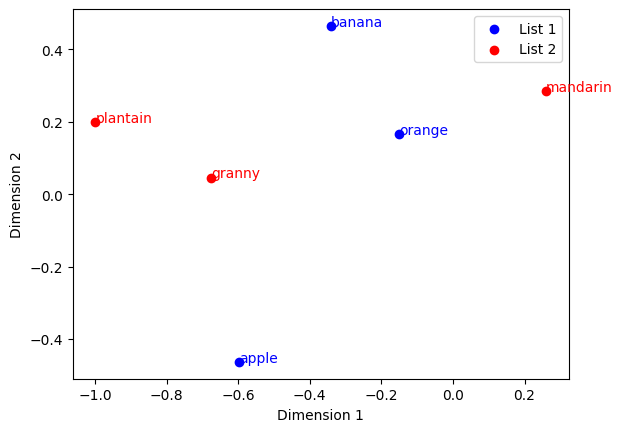

<Figure size 640x480 with 0 Axes>

In [116]:
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
def compute_embeddings(word_list, model):
    # Load the pre-trained word embedding model
    # Compute embeddings for each word in the list
    embeddings = []
    for word in word_list:
        if word in model:
            embeddings.append(model[word])
        else:
            print(word, "out of vocabulary")
            embeddings.append(np.zeros(model.vector_size))  # Use zero vector for out-of-vocabulary words

    return np.array(embeddings)

def plot_embeddings(embeddings1, embeddings2, labels1, labels2):
    plt.clf()
    # Plot embeddings of list 1 in blue
    plt.scatter(embeddings1[:, 0], embeddings1[:, 1], color='blue', label='List 1')

    # Plot embeddings of list 2 in red
    plt.scatter(embeddings2[:, 0], embeddings2[:, 1], color='red', label='List 2')

    # Add labels for each word in list 1
    for i, label in enumerate(labels1):
        plt.annotate(label, (embeddings1[i, 0], embeddings1[i, 1]), color='blue')

    # Add labels for each word in list 2
    for i, label in enumerate(labels2):
        plt.annotate(label, (embeddings2[i, 0], embeddings2[i, 1]), color='red')

    # Add legend and labels
    plt.legend()
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    # Show the plot
    plt.show()
    plt.close()
    

# Example usage
word_list1 = ['apple', 'banana', 'orange']
word_list2 = ['granny', 'mandarin', 'plantain']

embeddings1 = compute_embeddings(word_list1, word_vectors)
embeddings2 = compute_embeddings(word_list2, word_vectors)

plot_embeddings(embeddings1, embeddings2, word_list1, word_list2)
plt.clf()

In [122]:

import plotly.graph_objects as go

def plot_interactive_embeddings(embeddings1, embeddings2, labels1, labels2, list1_name, list2_name):
    fig = go.Figure()

    # Add scatter trace for embeddings of list 1
    fig.add_trace(go.Scatter(
        x=embeddings1[:, 0],
        y=embeddings1[:, 1],
        mode='markers',
        name=list1_name,
        text=labels1,
        marker=dict(color='blue')
    ))

    # Add scatter trace for embeddings of list 2
    fig.add_trace(go.Scatter(
        x=embeddings2[:, 0],
        y=embeddings2[:, 1],
        mode='markers',
        name=list2_name,
        text=labels2,
        marker=dict(color='red')
    ))

    # Set layout options
    fig.update_layout(
        title='Embeddings',
        xaxis=dict(title='Dimension 1'),
        yaxis=dict(title='Dimension 2'),
        hovermode='closest'
    )

    # Show the plot
    fig.show()

embeddings1 = compute_embeddings(ricochet_themes_english_local_preprocessed, word_vectors)
embeddings2 = compute_embeddings(ecole_des_loisir_sub_theme_list_english_local_preprocessed, word_vectors)

plot_interactive_embeddings(embeddings1, embeddings2, ricochet_themes_english_local_preprocessed, ecole_des_loisir_sub_theme_list_english_local_preprocessed, "Ricochet", "Ecole des loisirs")


abecedary out of vocabulary
children's out of vocabulary
interculturality out of vocabulary
kamishibai out of vocabulary
children's out of vocabulary
ritournel out of vocabulary
potholing out of vocabulary
transidentity out of vocabulary
antiquity: out of vocabulary
antiquity: out of vocabulary
antiquity: out of vocabulary
antiquity: out of vocabulary
history: out of vocabulary
history: out of vocabulary
history: out of vocabulary
history: out of vocabulary
history: out of vocabulary
history: out of vocabulary
history: out of vocabulary
history: out of vocabulary
history: out of vocabulary
history: out of vocabulary
eco-anxiety out of vocabulary
potholing out of vocabulary
noah's out of vocabulary


### spacy

In [129]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_md")

# Process a text
text = "I want to find synonyms for the word 'happy'"
doc = nlp(text)

# Find synonyms for each token in the text
synonyms = []
for token in doc:
    synonyms.append(token._.synonyms)

# Print the synonyms
for token, syn in zip(doc, synonyms):
    print(f"Token: {token.text}, Synonyms: {syn}")


AttributeError: [E046] Can't retrieve unregistered extension attribute 'synonyms'. Did you forget to call the `set_extension` method?

### wordnet

In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from nltk.corpus import wordnet
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

word = "absurd"
synonyms = get_synonyms(word)
print(synonyms)

['absurd', 'the_absurd', 'absurd', 'absurd', 'cockeyed', 'derisory', 'idiotic', 'laughable', 'ludicrous', 'nonsensical', 'preposterous', 'ridiculous']


# french embeddings